In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
from pathlib import Path
from pandas.plotting import scatter_matrix
import hvplot.pandas

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
pd.set_option('display.width', 1000)

In [7]:

import os

import requests

import json


from dotenv import load_dotenv

import alpaca_trade_api as tradeapi


import datetime

%matplotlib inline


# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()

np.set_printoptions(precision=5, suppress=True,
                   formatter={'float': lambda x: f'{x:6.3f}'})


Python-dotenv could not parse statement starting at line 1


In [29]:
close_prices = pd.read_csv(
    Path('sp500_closefull.csv'),
    index_col=['Date'],
    parse_dates=True,
    infer_datetime_format=True,
    delimiter=','
) 
close_prices_lineup = close_prices[['CSCO','TROW','TPR' ,'DVN', 'MRO']]

In [30]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE

data_returns = close_prices_lineup.pct_change().dropna()

display(data_returns.head())
display(data_returns.tail())

CSCO      TROW       TPR       DVN       MRO
Date                                                        
2010-01-05 -0.004455  0.011213  0.012118  0.001045  0.000934
2010-01-06 -0.006509 -0.015633  0.019592 -0.003001  0.022091
2010-01-07  0.004505 -0.000739  0.000534 -0.005888 -0.006088
2010-01-08  0.005300 -0.003881 -0.005868  0.001974  0.001531
2010-01-11 -0.002839  0.007050  0.028173 -0.013663  0.000000

CSCO      TROW       TPR       DVN       MRO
Date                                                        
2018-12-24 -0.037515 -0.021088 -0.015544 -0.042446 -0.058736
2018-12-26  0.054369  0.055327  0.049226  0.082459  0.119273
2018-12-27  0.010360  0.018516  0.007672  0.008366  0.008469
2018-12-28 -0.003263  0.000329 -0.009956 -0.019214 -0.014696
2018-12-31  0.000000  0.000000  0.000000  0.000000  0.000000

<AxesSubplot:title={'center':'Daily Return Data of The Four Fund Portfolios'}, xlabel='Date'>

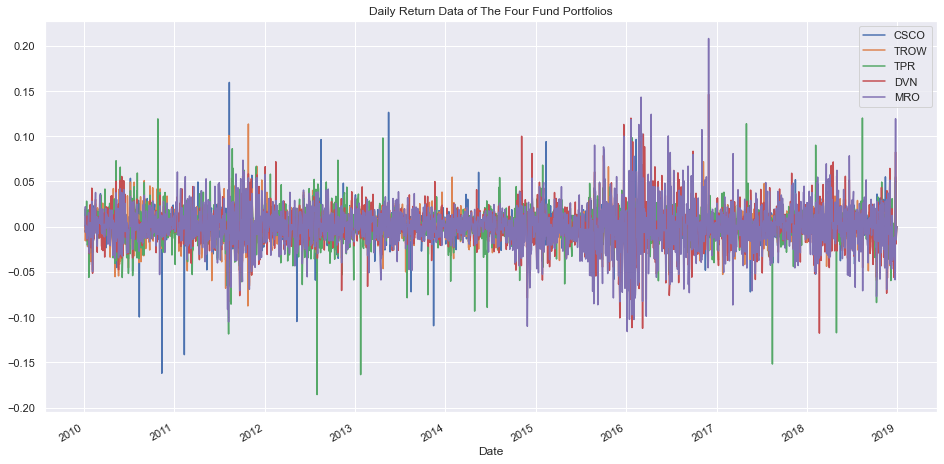

In [31]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.plot(figsize=(16,8), title="Daily Return Data of The Four Fund Portfolios")


CSCO      TROW       TPR       DVN       MRO
Date                                                        
2018-12-24  1.631430  1.561581  0.889562  0.273998  0.660972
2018-12-26  1.720130  1.647978  0.933352  0.296591  0.739808
2018-12-27  1.737951  1.678493  0.940512  0.299073  0.746073
2018-12-28  1.732280  1.679044  0.931148  0.293326  0.735109
2018-12-31  1.732280  1.679044  0.931148  0.293326  0.735109

<AxesSubplot:title={'center':'Cumulative Returs Whale Funds With S&P 500'}, xlabel='Date'>

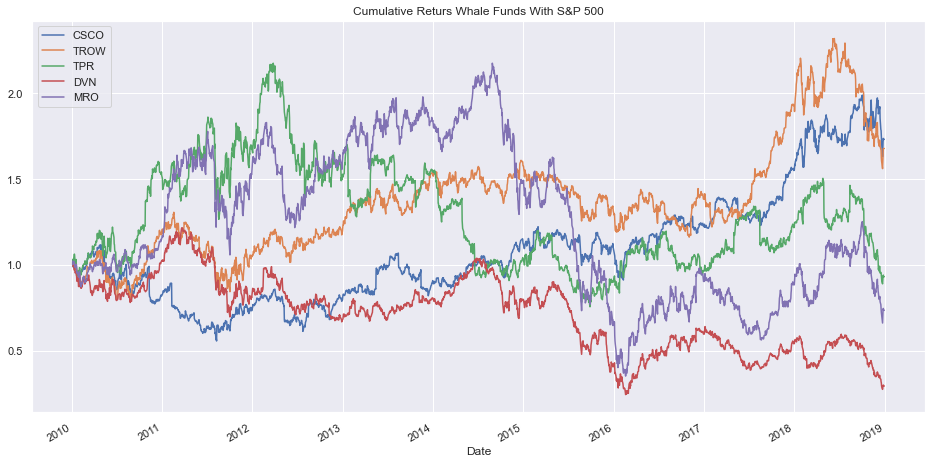

In [32]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE


cumusum_returns = (1 + data_returns).cumprod() 

display(cumusum_returns.tail())

cumusum_returns.plot(figsize=(16,8), title='Cumulative Returs Whale Funds With S&P 500')


CSCO         TROW          TPR          DVN          MRO
Date                                                                       
2010-01-05     0.995545     1.011213     1.012118     1.001045     1.000934
2010-01-06     1.984609     2.006618     2.044065     1.999086     2.023980
2010-01-07     2.978129     3.001287     3.076563     2.991250     3.040797
2010-01-08     3.976914     3.992096     4.103002     3.985373     4.059171
2010-01-11     4.972863     4.989890     5.158358     4.965914     5.077546
...                 ...          ...          ...          ...          ...
2018-12-24  2445.256325  3094.260757  2910.240325  1622.463896  2841.607119
2018-12-26  2446.976455  3095.908735  2911.173676  1622.760487  2842.346927
2018-12-27  2448.714405  3097.587228  2912.114189  1623.059560  2843.093000
2018-12-28  2450.446686  3099.266272  2913.045337  1623.352886  2843.828109
2018-12-31  2452.178966  3100.945316  2913.976486  1623.646213  2844.563218

[2269 rows x 5 columns]

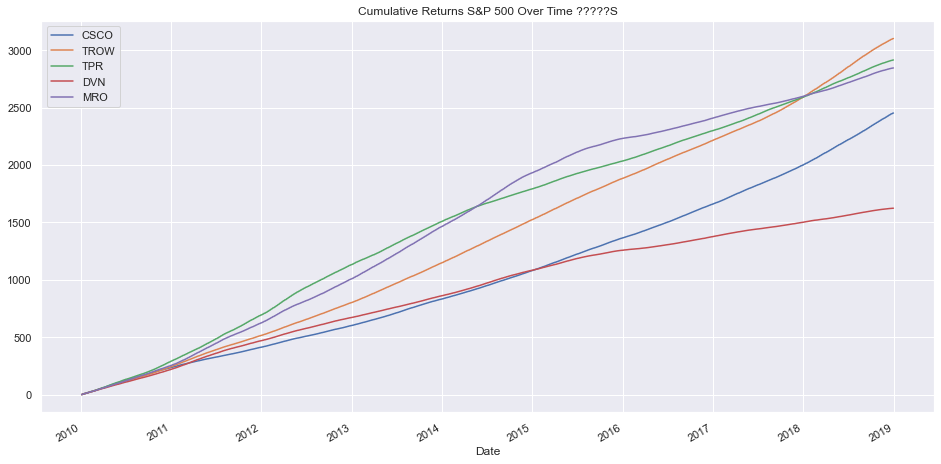

In [33]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

cumusum_returns.cumsum().plot(figsize=(16,8), title='Cumulative Returns S&P 500 Over Time ?????S')


cumusum_returns.cumsum()

<AxesSubplot:title={'center':'Box Plot To Visualize the Volatility'}>

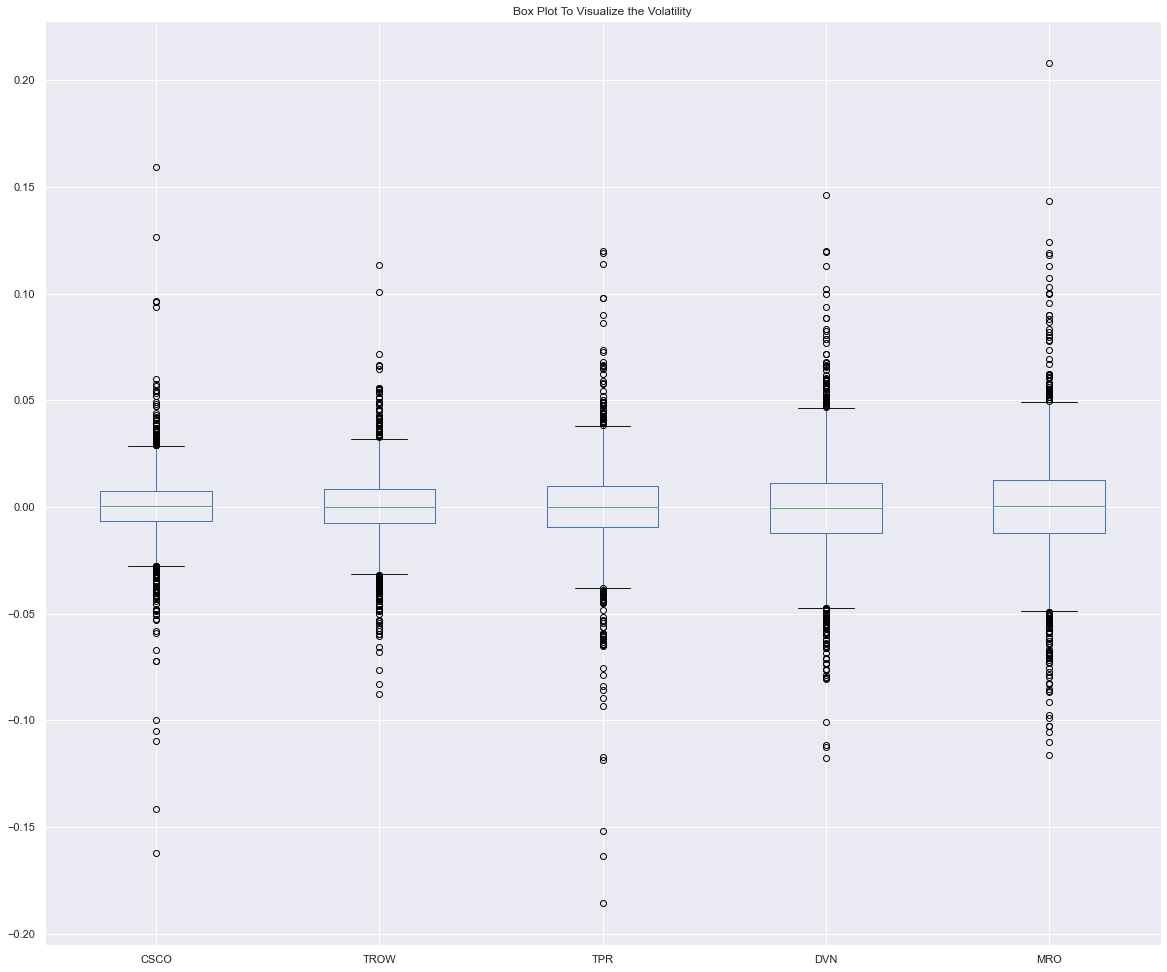

In [34]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.plot(kind='box', figsize=(20,17), title="Box Plot To Visualize the Volatility")



In [35]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE


return_data_std = data_returns.std()


return_data_std.sort_values()



TROW    0.015793
CSCO    0.015871
TPR     0.019715
DVN     0.022823
MRO     0.025084
dtype: float64

In [36]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# YOUR CODE HERE


anu_std_return_data = return_data_std * np.sqrt(252)

anu_std_return_data.sort_values()


TROW    0.250703
CSCO    0.251941
TPR     0.312969
DVN     0.362300
MRO     0.398199
dtype: float64

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation Window'}, xlabel='Date'>

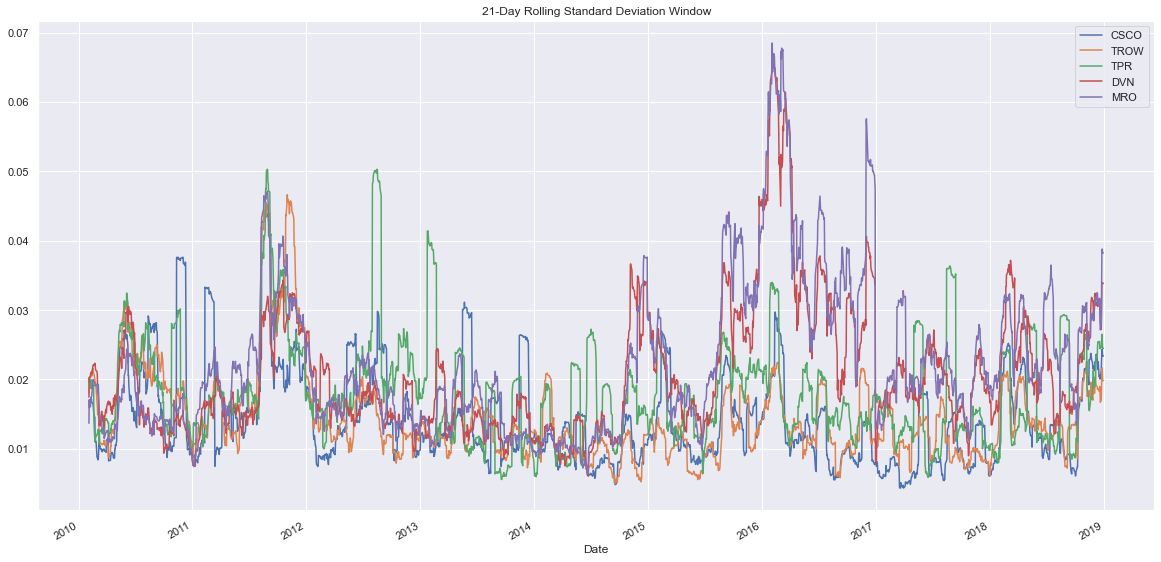

In [37]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

data_returns.rolling(window=21).std().plot(title='21-Day Rolling Standard Deviation Window', figsize=(20,10))



In [38]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE

trading_days = 252
yearly_returns = data_returns * trading_days
yearly_returns.sort_values


<bound method DataFrame.sort_values of                  CSCO       TROW        TPR        DVN        MRO
Date                                                             
2010-01-05  -1.122728   2.825720   3.053695   0.263295   0.235437
2010-01-06  -1.640356  -3.939633   4.937151  -0.756175   5.566874
2010-01-07   1.135141  -0.186154   0.134511  -1.483895  -1.534233
2010-01-08   1.335499  -0.978003  -1.478802   0.497570   0.385914
2010-01-11  -0.715325   1.776610   7.099539  -3.442988   0.000000
...               ...        ...        ...        ...        ...
2018-12-24  -9.453762  -5.314133  -3.917115 -10.696489 -14.801486
2018-12-26  13.701108  13.942333  12.404955  20.779785  30.056877
2018-12-27   2.610776   4.666135   1.933330   2.108328   2.134084
2018-12-28  -0.822182   0.082792  -2.508932  -4.841927  -3.703290
2018-12-31   0.000000   0.000000   0.000000   0.000000   0.000000

[2269 rows x 5 columns]>

In [39]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE

portfolio_sharpe_ratio_annual = (data_returns.mean() * 252) / (data_returns.std() * np.sqrt(252))
portfolio_sharpe_ratio_annual

CSCO    0.368940
TROW    0.354943
TPR     0.133016
DVN    -0.195010
MRO     0.112583
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios For The Funds & S&P500'}>

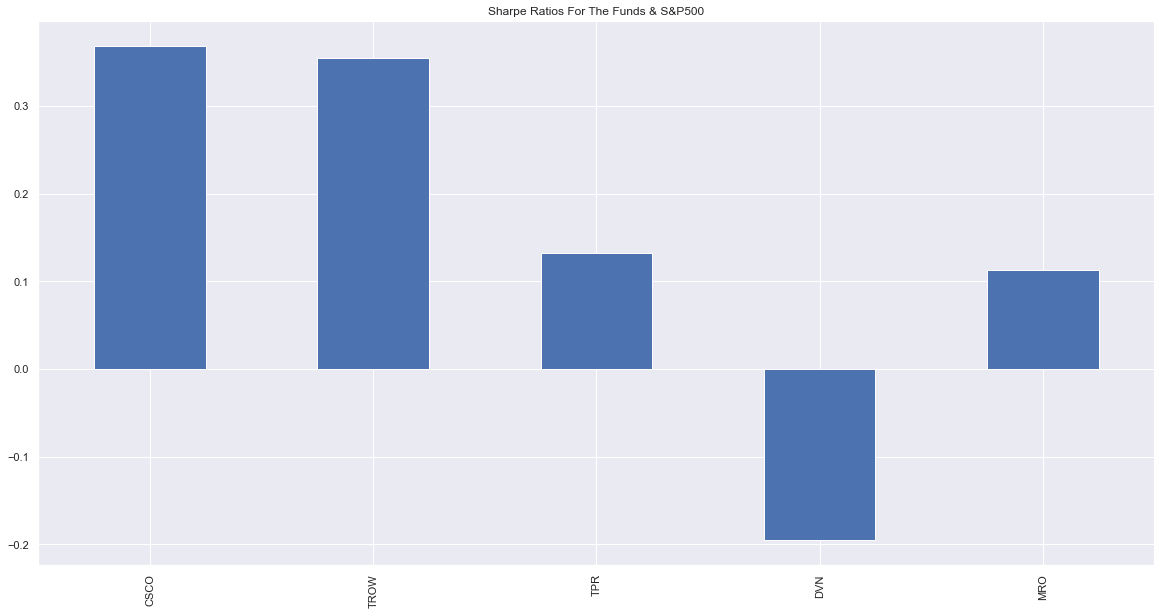

In [40]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

portfolio_sharpe_ratio_annual.plot(kind='bar', figsize=(20, 10), title="Sharpe Ratios For The Funds & S&P500")



In [88]:
mro_data = pd.DataFrame(raw[symbol2])
mro_data.dropna(inplace=True)

In [89]:
trow_returns = data_returns[['TROW']]

dvn_returns = data_returns[['DVN']]

In [90]:
"""
# Trading Strategy

Simple Moving Average.
"""

'\n# Trading Strategy\n\nSimple Moving Average.\n'

In [91]:
SMA1 = 52 # Shorter SMA
SMA2 = 208 # Longer SMA

In [99]:
trow_returns['SMA1'] = trow_returns['TROW'].rolling(SMA1).mean() # Shorter SMA
trow_returns['SMA2'] = trow_returns['TROW'].rolling(SMA2).mean() # Longer SMA
trow_returns.dropna(inplace=True)

In [100]:
mro_data['SMA1'] = mro_data['MRO'].rolling(SMA1).mean() # Shorter SMA
mro_data['SMA2'] = mro_data['MRO'].rolling(SMA2).mean() # Longer SMA
mro_data.dropna(inplace=True)

In [101]:
dvn_returns['SMA1'] = dvn_returns['DVN'].rolling(SMA1).mean() # Shorter SMA
dvn_returns['SMA2'] = dvn_returns['DVN'].rolling(SMA2).mean() # Longer SMA

<AxesSubplot:xlabel='Date'>

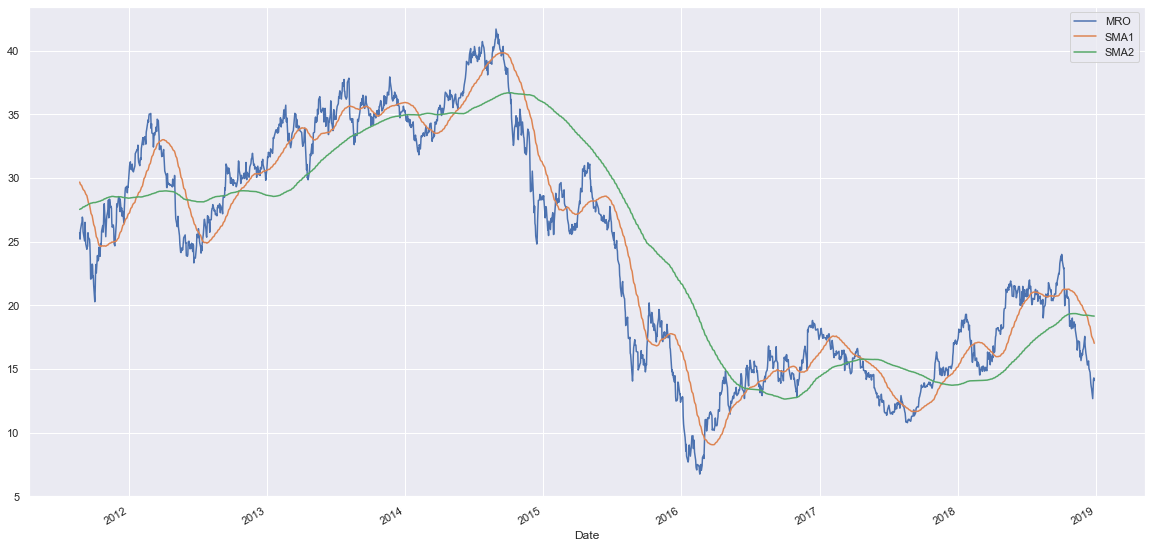

In [102]:
mro_data.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

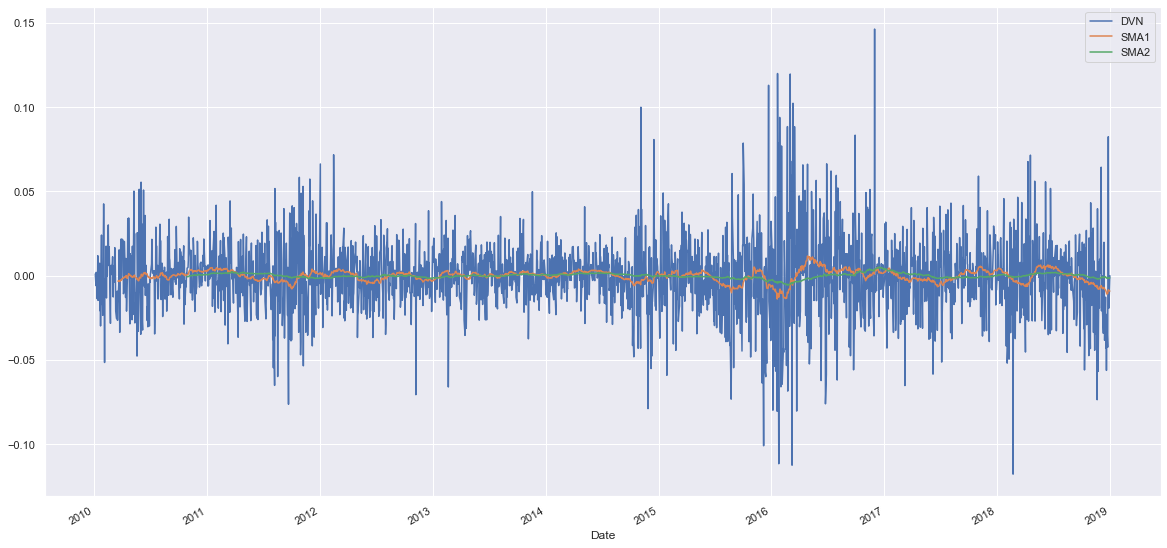

In [103]:
dvn_returns.plot(figsize=(20, 10))

<AxesSubplot:xlabel='Date'>

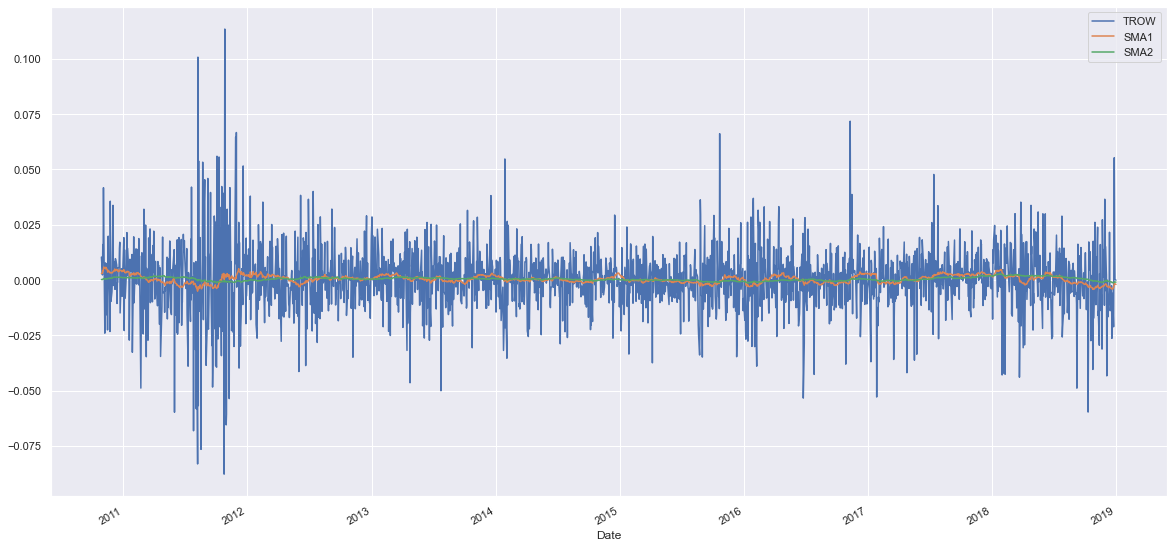

In [104]:
trow_returns.plot(figsize=(20, 10))

In [105]:
dvn_returns.dropna(inplace=True)

In [109]:
"""
Go long(=+1)when the shorter SMA is above the longer SMA

Go short(=+1)when the shorter SMA is below the longer SMA
"""
mro_data['Position'] = np.where(mro_data['SMA1'] > mro_data['SMA2'], 1, -1)


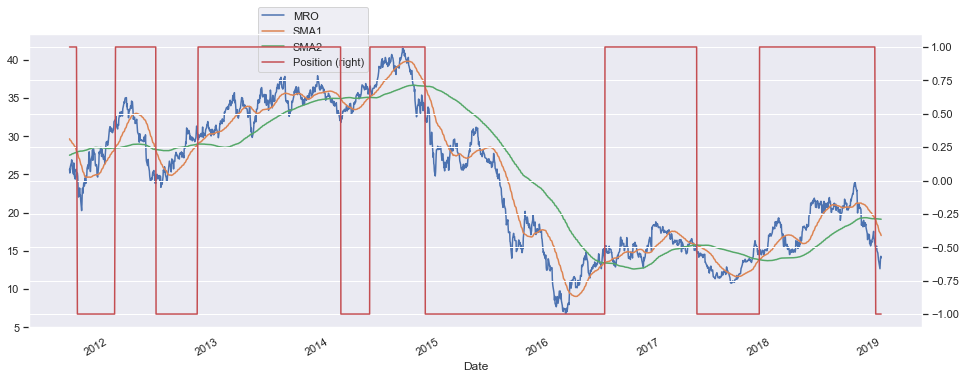

In [110]:
ax = mro_data.plot(secondary_y='Position', figsize=(16,6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

In [113]:
"""
Vectorized Backtesting:

Vectorized backtesting is implemented as follows. First, the log returns are caculated.
Then the positionings, represented as +1 or -1, are multiplied by the relavant log return.
This simple calculation is possible since a long position earns the return of the stock and short the negative.
Finally the log returns for the stock and the algo trading strategy based on SMAs need to be added up
and the exponential function applied to arrive at the performance values.
"""
mro_data['Returns'] = np.log(mro_data['MRO'] / mro_data['MRO'].shift(1))

mro_data['Strategy'] = mro_data['Position'].shift(1) * mro_data['Returns']

mro_data.dropna(inplace=True)

mro_data = mro_data[mro_data.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]  # .astype(np.float64) ?

mro_data['AnSTD'] = mro_data['MRO'].std() * np.sqrt(252)

np.exp(mro_data[['Returns','Strategy']].sum())


Returns     0.547860
Strategy    0.975962
dtype: float64

In [114]:
from itertools import product 
sma1 = range(20, 61, 4)
sma2 = range(100, 281, 10)

In [118]:
results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2):
    data = pd.DataFrame(trow_returns['TROW'])
    data.dropna(inplace=True)
    data['Returns'] = np.log(trow_returns['TROW'] / trow_returns['TROW'].shift(1))
    data['SMA1'] = trow_returns['TROW'].rolling(SMA1).mean() # Shorter SMA
    data['SMA2'] = trow_returns['TROW'].rolling(SMA2).mean() # Longer SMA
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
    'MARKET': perf['Returns'],
    'STRATEDY': perf['Strategy'],
    'OUT': perf['Strategy'] - perf['Returns']},
    index=[0]), ignore_index=True)



    

In [472]:

close_prices.tail()

CSCO        UAL       TROW        ISRG       PRGO        TPR        DVN    MRO          BA        VRTX       GILD       NLSN        EQIX        TIF        MDT           V       QRVO          A         MO       SWKS       MCHP       CDNS        WLTW        CHTR        EIX        BBY        WBA         HCA        AJG         DTE          C          T         CF       DISH        MGM  XL         HUM       CBOE        CFG         WU        APH        SYY         MSI    FCX        ADM          LH        STI         UTX        PKI        LNT        BAC        LNC        PSX         GPN       SRCL         PPG        IRM         IQV         ESS        NOV  NAVI        HAL         STZ        FLS        DXC        ADI     F        HOG        ADBE         TDG        ULTA         ARE         SYK          CB        TSN        FLR         PEP        PEG         LLY        COST        REG    NWS        LOW       MDLZ        FMC        XEL        AIZ       PDCO       CERN  \
Date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
2018-12-24  40.279999  79.120003  84.949997  434.890015  36.500000  32.299999  20.980000  12.66  294.160004  151.910004  60.540001  22.110001  339.019989  74.209999  85.800003  121.730003  56.470001  62.669998  47.560001  62.779999  65.730003  40.310001  146.610001  273.519989  54.330002  48.240002  65.260002  116.129997  68.989998  108.949997  49.259998  27.360001  40.110001  23.980000  21.840000 NaN  273.359985  91.230003  27.940001  16.549999  75.650002  59.950001  108.970001   9.78  39.619999  120.820000  46.900002  102.059998  71.870003  41.209999  22.730000  48.790001  78.500000   95.370003  35.189999   95.599998  30.639999  105.699997  239.649994  24.430000  8.43  25.139999  156.949997  35.889999  50.029999  80.419998  7.63  31.910000  205.160004  314.510010  229.059998  110.279999  145.000000  120.190002  50.750000  29.990000  106.029999  49.889999  106.750000  189.990005  55.759998  11.06  85.959999  39.480000  60.789246  48.599998  82.650002  19.340000  48.900002   
2018-12-26  42.470001  83.800003  89.650002  461.980011  40.700001  33.889999  22.709999  14.17  313.929993  161.839996  63.220001  23.530001  349.269989  77.800003  88.660004  130.229996  60.020000  65.540001  48.430000  66.709999  70.379997  42.590000  148.860001  285.700012  56.200001  51.570000  67.720001  121.290001  71.309998  109.650002  51.439999  28.080000  42.599998  24.889999  23.200001 NaN  282.609985  94.120003  29.490000  17.010000  78.849998  61.230000  112.169998  10.40  40.669998  124.540001  49.200001  106.010002  75.699997  41.680000  24.110001  50.619999  84.199997  101.440002  36.360001   99.269997  32.070000  111.190002  244.800003  26.040001  8.85  26.430000  163.419998  38.220001  52.130001  84.339996  7.85  33.810001  222.949997  332.489990  242.199997  113.970001  150.830002  125.029999  52.060001  32.310001  108.330002  50.709999  111.089996  198.630005  58.080002  11.36  91.040001  40.000000  63.694710  49.560001  87.070000  19.969999  51.560001   
2018-12-27  42.910000  83.040001  91.309998  468.7000

In [477]:
close_prices_lineup = close_prices[['QCOM', 'CSCO','UAL','TROW','ISRG' ,'PRGO','TPR' ,'DVN', 'MRO']]

In [478]:
"""
Linear OLS Regression 
This section applies linear OLS regression to predict the direction of the market movements based on historical log returns.
To keep things simple, only two features are used. The first feature (lag_1) represents the log returns of the financial time series lagged by one day.
Second feature lags the log returns by two days. Log returns in contrast to prices - are stationary in general,
which often is a necessary condition for the application of statistical and ML algo.
"""

raw = close_prices_lineup
symbol2 = 'QCOM'

In [479]:
QCOM_data = pd.DataFrame(raw[symbol2])

In [481]:
QCOM_data['Returns'] = np.log(QCOM_data / QCOM_data.shift(1))

QCOM_data.dropna(inplace=True)

In [482]:
QCOM_data['direction'] = np.sign(QCOM_data['Returns']).astype(int)

<AxesSubplot:>

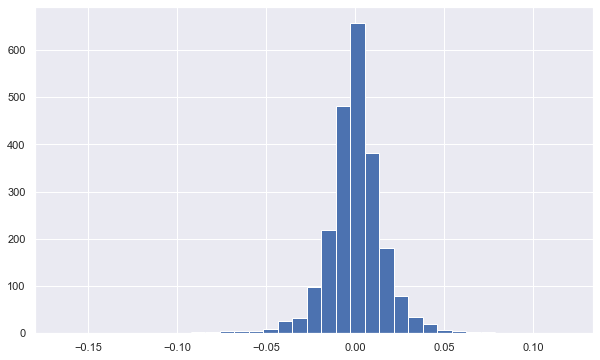

In [483]:
QCOM_data['Returns'].hist(bins=35,figsize=(10, 6))

In [126]:
lags = 2

def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags + 1):
        col = 'lag_{}'.format(lag)
        data[col] = data['Returns'].shift(lag)
        cols.append(col)
        
        
create_lags(mro_data)

In [127]:
mro_data.dropna(inplace=True)

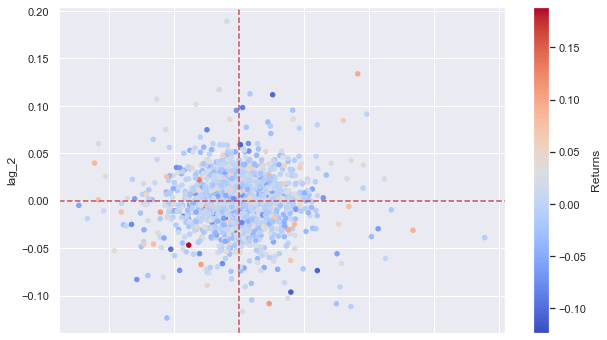

In [128]:
mro_data.plot.scatter(x='lag_1', y='lag_2', c='Returns', cmap='coolwarm', figsize=(10,6), colorbar=True)
plt.axvline(0, c='r', ls='--')
plt.axhline(0, c='r', ls='--')

In [339]:
reg_data = mro_data

"""
# Regression

linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movements based on the features,
and to backtest a trading strategy based on the predictions. Two approaches are avaliable:
using the log returns or only the direction data as the dependent variable during the regression. 
Predicitons are transformed to either +1, -1 to only work with the direction of the prediction:
"""

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [340]:
reg_data['pos_ols_1'] = model.fit(reg_data[cols],
                                 reg_data['Returns']).predict(reg_data[cols]) # the regression is implemented on the log returns directly

In [341]:
reg_data['pos_ols_2'] = model.fit(reg_data[cols],
                                 reg_data['direction']).predict(reg_data[cols]) # on the direction data which is of primary interest

In [342]:
reg_data[['pos_ols_1','pos_ols_2']] = np.where(reg_data[['pos_ols_1','pos_ols_2']] > 0, 1, -1) # The real_valued predicitions are transformed to directional values

In [343]:
reg_data[['pos_ols_1']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_1
-1           1196
 1           1045
dtype: int64

In [344]:
reg_data[['pos_ols_2']].value_counts() # The two approaches yield diffrent directional predictions in general

pos_ols_2
 1           1389
-1            852
dtype: int64

In [345]:
(reg_data['pos_ols_1'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

1330

In [346]:
(reg_data['pos_ols_2'].diff() != 0).sum() # However, both lead to a relatively large number of trades over time

1169

In [347]:
"""
With directional predictions, vectorized backtesting can be applied to jude the performance of the resulting trading strategies. 
At this stage, we have a few assumptions, 'zero transaction costs' and the usage of the same data set for both training and testing. 
"""

reg_data['strat_ols_1'] = reg_data['pos_ols_1'] * reg_data['Returns']

reg_data['strat_ols_2'] = reg_data['pos_ols_2'] * reg_data['Returns']

In [348]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

Returns         0.798823
strat_ols_1    22.249180
strat_ols_2     0.795286
dtype: float64

In [349]:
(reg_data['direction'] == reg_data['pos_ols_1']).value_counts() 

True     1147
False    1094
dtype: int64

In [350]:
(reg_data['direction'] == reg_data['pos_ols_2']).value_counts() 

True     1142
False    1099
dtype: int64

<AxesSubplot:xlabel='Date'>

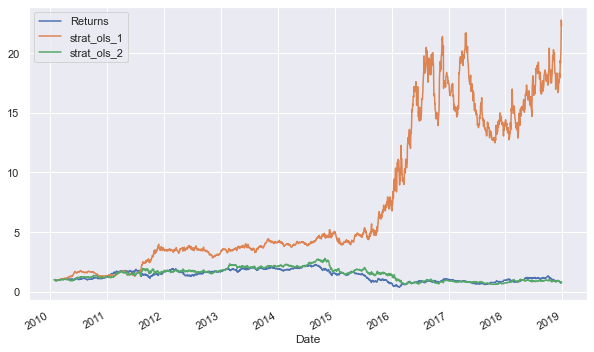

In [351]:
reg_data[['Returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [352]:
"""
# Clustering 
Here we apply k-means clustering to financial time series data to automatically come up with clusters that are used to formulate a trading strategy.
The algo identefies two clusters of feature values that predict either an upward or downward movement.

The following code applies the kmeans algo to the twwo features as used before.
ploting the two clusters
"""
from sklearn.cluster import KMeans

mod = KMeans(n_clusters=2, random_state=0)


In [353]:
mod.fit(reg_data[cols])

KMeans(n_clusters=2, random_state=0)

In [354]:
reg_data['pos_clust'] = mod.predict(reg_data[cols])

In [355]:
reg_data['pos_clust'] = np.where(reg_data['pos_clust'] == 1, -1, 1)

In [356]:
reg_data['pos_clust'].values


array([-1, -1,  1, ..., -1,  1, -1])

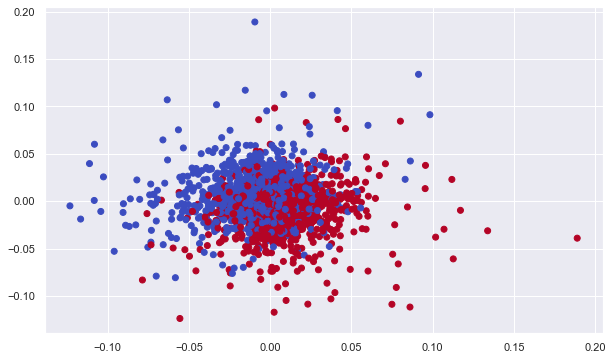

In [357]:
plt.figure(figsize=(10, 6))
plt.scatter(reg_data[cols].iloc[:, 0], reg_data[cols].iloc[:, 1],
           c=reg_data['pos_clust'], cmap='coolwarm')

In [358]:
"""
Frequency Approach 
Beyond more sophisticated algo and techniques , one might come up with the idea of using a frequancy approach to predict
directional movements in fin markets. On might transformm two realworld features into binary ones
and asses the probability of an upward and downward movement, respectively, from the historical observation os such movements given
the four possible combinations for the two binary features.
"""

def create_bins(data, bins=[0]):
    global cols_bin
    cols_bin = []
    for col in cols:
        col_bin = col + '_bin'
        data[col_bin] = np.digitize(data[col], bins=bins)
        cols_bin.append(col_bin)

In [359]:
close_prices_lineup = close_prices[['CSCO','UAL','TROW','ISRG' ,'PRGO','TPR' ,'DVN', 'MRO']]

In [360]:
"""
# Classification 
THis section applies the classification algo from ml to predicting the
direction of price movements in financial markets.
The application of the Logistic Regression, Gaussina Naive Bayes, and Support Vector Machines. 
"""

from sklearn import linear_model 

from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC 

C = 1 

models = {
    'log_reg' : linear_model.LogisticRegression(C=C),
    'gauss_nb' : GaussianNB(),
    'svm' : SVC(C=C)
}

In [414]:
def fit_models(data):
    mfit = {model : models[model].fit(data[cols_bin],
                                     data['direction'])
           for model in models.keys()}
    
#fit_models(data)

In [415]:
def derive_positions(data):
    for model in models.keys():
        data['pos_' + model] = models[model].predict(data[cols_bin])
        
#fit_models(data)

In [430]:
# Second, the vectorized backtesting of the resulting trading strategies

def evaluate_strats(data):
    global sel
    sel = []
    for model in models.keys():
        col = 'strat_' + model
        data[col] = data['pos_' + model] * data['Returns']
        sel.append(col)
    sel.insert(0, 'Returns')
    
#evaluate_strats(data)
#sel.insert(1, 'strat_freq')
#data[sel].sum().apply(np.exp)
#data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [417]:
"""
# Five Binary Features 

An attempt to improve the strategies' performance,
the following code works eith five binary lags instead of two. 
"""


"\n# Five Binary Features \n\nAn attempt to improve the strategies' performance,\nthe following code works eith five binary lags instead of two. \n"

In [418]:
#reg_data = pd.DataFrame(raw[symbol2])

#mro_data['Returns'] = np.log(mro_data / mro_data.shift(1))

#mro_data.dropna(inplace=True)

#mro_data['direction'] = np.sign(mro_data['Returns']).astype(int)

In [484]:
lags = 5
create_lags(QCOM_data)
close_prices_lineup.dropna(inplace=True)


In [486]:
create_bins(QCOM_data)
cols_bin


['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']

In [421]:
#MROdata = mro_data[['lag_1_bin', 'lag_2_bin', 'lag_3_bin', 'lag_4_bin', 'lag_5_bin']]

In [487]:
QCOM_data.dropna(inplace=True)


In [489]:
QCOM_data['pos_freq'] = np.where(QCOM_data[cols_bin].sum(axis=1) == 2, -1, 1)

In [490]:
(QCOM_data['direction'] == QCOM_data['pos_freq']).value_counts() 

True     1137
False    1114
dtype: int64

In [491]:
QCOM_data['strat_freq'] =  QCOM_data['pos_freq'] * QCOM_data['Returns']

In [492]:
QCOM_data[['Returns', 'strat_freq']].sum().apply(np.exp)

Returns       1.136295
strat_freq    1.974594
dtype: float64

<AxesSubplot:xlabel='Date'>

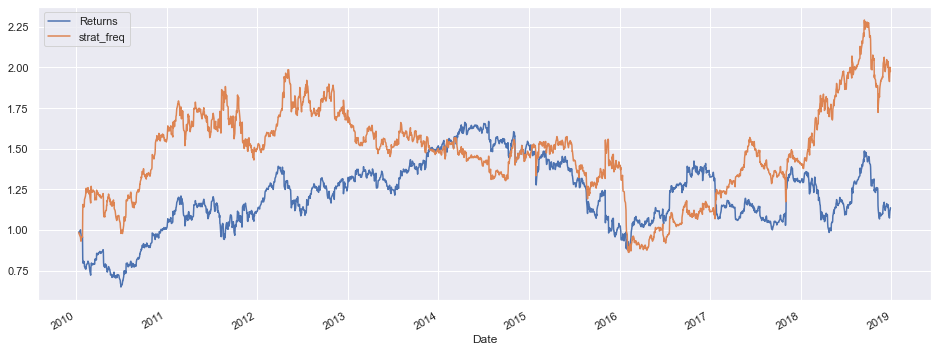

In [493]:
QCOM_data[['Returns', 'strat_freq']].cumsum().apply(np.exp).plot(figsize=(16,6))

In [494]:
fit_models(QCOM_data)


In [495]:
derive_positions(QCOM_data)

In [496]:
evaluate_strats(QCOM_data)

sel.insert(1, 'strat_freq')

In [497]:
QCOM_data

QCOM   Returns  direction     lag_1     lag_2     lag_3     lag_4     lag_5  lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin  pos_freq  strat_freq  pos_log_reg  pos_gauss_nb  pos_svm  strat_log_reg  strat_gauss_nb  strat_svm
Date                                                                                                                                                                                                                                                   
2010-01-12  48.490002 -0.016364         -1 -0.003645  0.009954  0.028579 -0.009826  0.023788          0          1          1          0          1         1   -0.016364           -1            -1       -1       0.016364        0.016364   0.016364
2010-01-13  48.700001  0.004321          1 -0.016364 -0.003645  0.009954  0.028579 -0.009826          0          0          1          1          0        -1   -0.004321            1             1        1       0.004321        0.004321   0.004321
2010-01-14  48.369999 -0.006799         -1  0.004321 -0.016364 -0.003645  0.009954  0.028579          1          0          0          1          1         1   -0.006799            1             1        1      -0.006799       -0.006799  -0.006799
2010-01-15  48.529999  0.003302          1 -0.006799  0.004321 -0.016364 -0.003645  0.009954          0          1          0          0          1        -1   -0.003302            1             1        1       0.003302        0.003302   0.003302
2010-01-19  49.320000  0.016148          1  0.003302 -0.006799  0.004321 -0.016364 -0.003645          1          0          1          0          0        -1   -0.016148            1             1       -1       0.016148        0.016148  -0.016148
...               ...       ...        ...       ...       ...       ...       ...       ...        ...        ...        ...        ...        ...       ...         ...          ...           ...      ...            ...             ...        ...
2018-12-21  54.849998 -0.027335         -1 -0.005661 -0.019045  0.013591 -0.010818 -0.008124          0          0          1          0          0         1   -0.027335            1             1        1      -0.027335       -0.027335  -0.027335
2018-12-24  53.650002 -0.022121         -1 -0.027335 -0.005661 -0.019045  0.013591 -0.010818          0          0          0          1          0         1   -0.022121            1             1        1      -0.022121       -0.022121  -0.022121
2018-12-26  55.959999  0.042156          1 -0.022121 -0.027335 -0.005661 -0.019045  0.013591          0          0          0          0          1         1    0.042156            1             1        1       0.042156        0.042156   0.042156
2018-12-27  56.090000  0.002320          1  0.042156 -0.022121 -0.027335 -0.005661 -0.019045          1          0          0          0          0         1    0.002320            1             1        1       0.002320        0.002320   0.002320
2018-12-28  56.810001  0.012755          1  0.002320  0.042156 -0.022121 -0.027335 -0.005661          1          1          0          0          0        -1   -0.012755            1             1        1       0.012755        0.012755   0.012755

[2251 rows x 21 columns]

In [498]:
QCOM_data[sel].sum().apply(np.exp)

Returns           1.136295
strat_freq        1.974594
strat_log_reg     2.138523
strat_gauss_nb    2.138523
strat_svm         5.994024
dtype: float64

In [499]:
)
#sel.insert(1, 'strat_freq')
#data[sel].sum().apply(np.exp)
#data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

SyntaxError: invalid syntax (<ipython-input-499-0b686bfa4a5a>, line 1)

<AxesSubplot:xlabel='Date'>

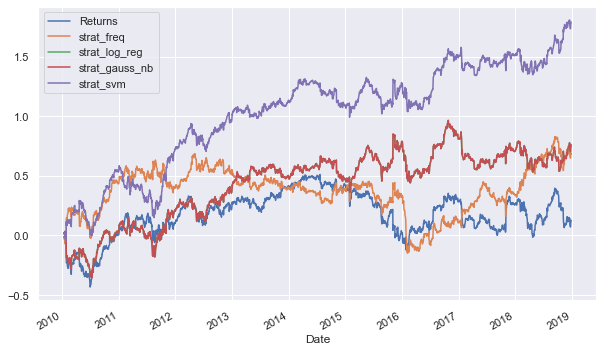

In [500]:
QCOM_data[sel].cumsum().plot(figsize=(10,6))

In [501]:
"""
# Five DIgitized Features 
The following code uses the first and second moment of the historical log returns
to digitize the feature data, allowing for more posible feature value combinations. 
This improves the performance of all classification algos used,


"""

'\n# Five DIgitized Features \nThe following code uses the first and second moment of the historical log returns\nto digitize the feature data, allowing for more posible feature value combinations. \nThis improves the performance of all classification algos used,\n\n\n'

In [502]:
mu = QCOM_data['Returns'].mean()
v = QCOM_data['Returns'].std()

In [503]:
bins = [mu - v, mu, mu + v]

In [504]:
create_bins(QCOM_data, bins)

In [505]:
QCOM_data[cols_bin]

lag_1_bin  lag_2_bin  lag_3_bin  lag_4_bin  lag_5_bin
Date                                                             
2010-01-12          1          2          3          1          3
2010-01-13          1          1          2          3          1
2010-01-14          2          1          1          2          3
2010-01-15          1          2          1          1          2
2010-01-19          2          1          2          1          1
...               ...        ...        ...        ...        ...
2018-12-21          1          0          2          1          1
2018-12-24          0          1          0          2          1
2018-12-26          0          0          1          0          2
2018-12-27          3          0          0          1          0
2018-12-28          2          3          0          0          1

[2251 rows x 5 columns]

In [506]:
derive_positions(QCOM_data)

In [507]:
evaluate_strats(QCOM_data)

In [508]:
QCOM_data[sel].sum().apply(np.exp)

Returns           1.136295
strat_log_reg     2.141142
strat_gauss_nb    2.361254
strat_svm         1.069429
dtype: float64

<AxesSubplot:xlabel='Date'>

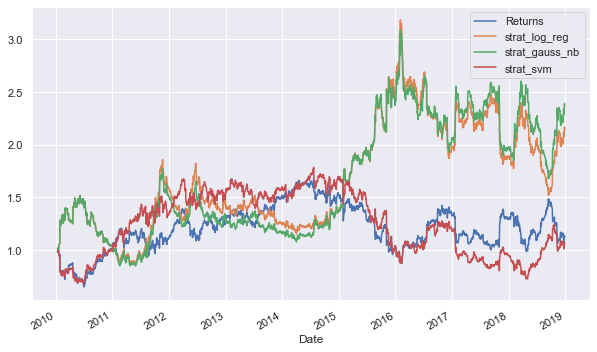

In [509]:
QCOM_data[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [511]:
"""
This chapter works with lagged return data as features data.
mostly in a binarized or digitized form.
Such features can be derived from the time series itself.
There are also Python packs for automated time series feature extraction tsfresh.

# Sequential Train-Test Split 
To judge the performance of the algo the following code implements a
sequential train test split. The idea is to simulate limited data during training 
and unseen data for test a simulation of live data. The real measure of the algo.
"""
split = int(len(QCOM_data) * 0.5)

In [512]:
train = QCOM_data.iloc[:split].copy()

In [513]:
fit_models(train)

In [514]:
test = QCOM_data.iloc[split:].copy()

In [515]:
derive_positions(test)

In [516]:
evaluate_strats(test)

In [517]:
test[sel].sum().apply(np.exp)

Returns           0.693527
strat_log_reg     0.950408
strat_gauss_nb    1.260316
strat_svm         0.472474
dtype: float64

<AxesSubplot:xlabel='Date'>

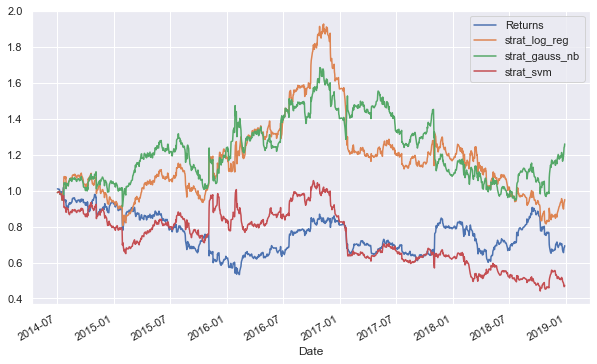

In [518]:
test[sel].cumsum().apply(np.exp).plot(figsize=(10,6))

In [587]:
"""
# Randomized Train-Test-Split
To test the performance of the algo out-of-sample.
"""
from sklearn.model_selection import train_test_split


train, test = train_test_split(QCOM_data,
                               test_size=.4,
                               shuffle=True,
                               random_state=14)

In [588]:
train = train.copy().sort_index()

In [589]:
fit_models(train)

In [590]:
derive_positions(test)

In [591]:
evaluate_strats(test)

In [592]:
test[sel].sum().apply(np.exp)

Returns           1.628437
strat_log_reg     2.553432
strat_gauss_nb    1.573073
strat_svm         2.230660
dtype: float64

<AxesSubplot:xlabel='Date'>

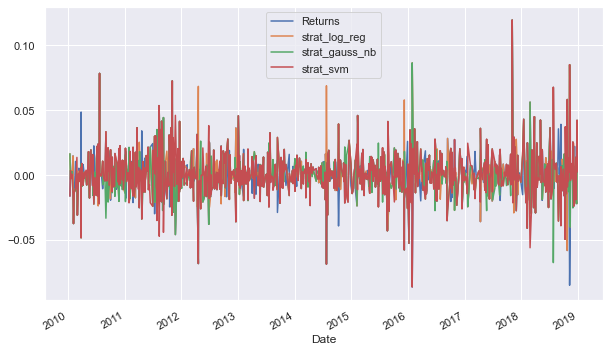

In [595]:
test[sel].plot(figsize=(10,6))

In [ ]:
"""
# Deep Neural Networks


"""